# Neural Networks

You're going to build a simple neural network to get a feeling of how quickly it is to accomplish this in Keras.

You will build a network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

A non-constrained output can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any non-constrained value.

## Installing and importing the requirements

In [ ]:
!python3 -m pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

: 

## Building a simple neural network architecture

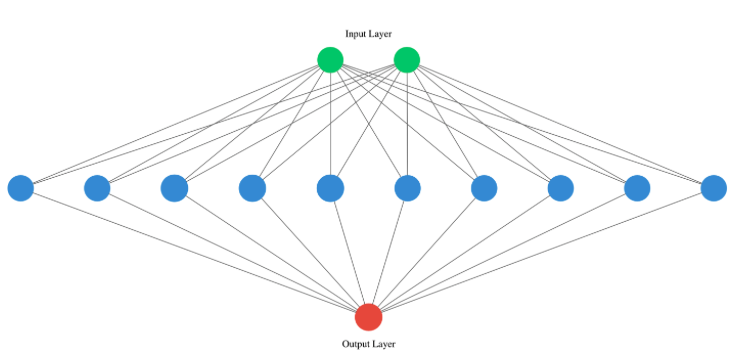

In [ ]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a new sequential model
model = Sequential()

#Add an input layer with 2 neurons and a hidden dense (fully-connected) layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation='relu'))

# Add a final 1 neuron layer
model.add(Dense(1))

In [ ]:
# Summarize your model
model.summary()

## Compiling, fitting, and evaluating your model

Remember that before training your Keras models you need to compile them. This can be done with the `.compile()` method. The `.compile()` method takes arguments such as the optimizer, used for weight updating, and the loss function, which is what we want to minimize. Training your model is as easy as calling the `.fit()` method, passing on the features, labels and a number of epochs to train for.

In [ ]:
# Compile your model
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(X_train, y_train, epochs = 30)

# Evaluate your model 
print("Final loss value:",model.evaluate(X_test, y_test))